In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scalar = StandardScaler()

import pickle

In [2]:
dataset_url = 'https://archive.ics.uci.edu/ml/datasets/Adult'

adult_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adult_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'
adult_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

## Description of Dataset

'>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, 

Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
'''

In [3]:
df = pd.read_csv(adult_data, header=None , skipinitialspace= True)

In [4]:
column_names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", 
                "Martial Status", "Occupation", "Relationship", "Race", "Sex", 
                "Capital-Gain", "Capital-Loss", "Hours-per-week", "Country", "Income"]

In [5]:
df.columns = column_names

In [6]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(32561, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-Gain    32561 non-null  int64 
 11  Capital-Loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.isna().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-per-week    0
Country           0
Income            0
dtype: int64

As we can see we don't have any null values as of now

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
Education-Num,32561.00,10.08,2.57,1.00,9.00,10.00,12.00,16.00
Capital-Gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
Capital-Loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
Hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [11]:
for i in df.columns:
    if df[i].dtype == 'O':
        print(df[i].value_counts())
        print('\n')

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Martial Status, dtype: int64


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical      

As we can notice there were some "?" in few of the columns, so we can replace these values with Null values

## Data Cleaning

In [12]:
df[df == '?'] = np.nan

In [13]:
df.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-per-week       0
Country            583
Income               0
dtype: int64

Now we can simply drop the null rows or impute them via multiple methods, but for the sake of simplicity let's impute Null with Mode of the particular column 

In [14]:
df.isnull().sum()*100/len(df)

Age              0.00
Workclass        5.64
fnlwgt           0.00
Education        0.00
Education-Num    0.00
Martial Status   0.00
Occupation       5.66
Relationship     0.00
Race             0.00
Sex              0.00
Capital-Gain     0.00
Capital-Loss     0.00
Hours-per-week   0.00
Country          1.79
Income           0.00
dtype: float64

In [15]:
df.dropna(how="any", inplace=True)

Since Education and Education-Num columns are present, we can drop Education-Num column

In [16]:
df.drop('Education-Num', axis=1,inplace=True)

In [17]:
df = df[df['Country'] != 'Holand-Netherlands']

In [18]:
df

,Age,Workclass,fnlwgt,Education,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA

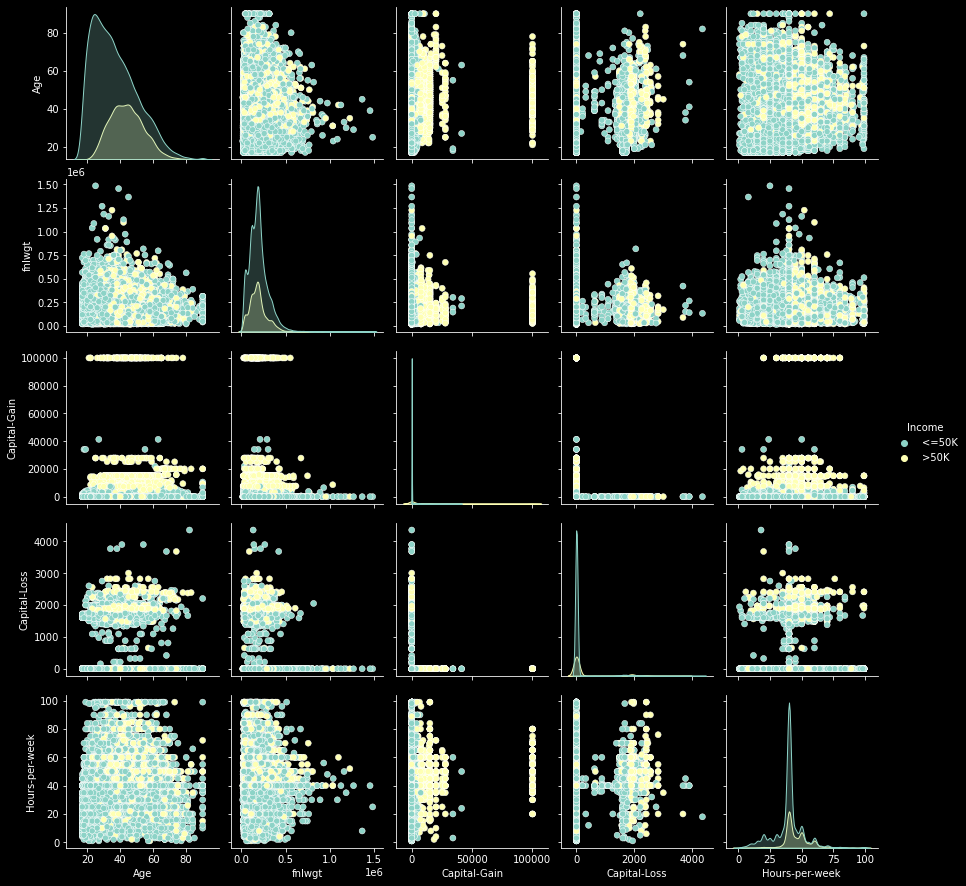

In [19]:
sns.pairplot(df, hue='Income')

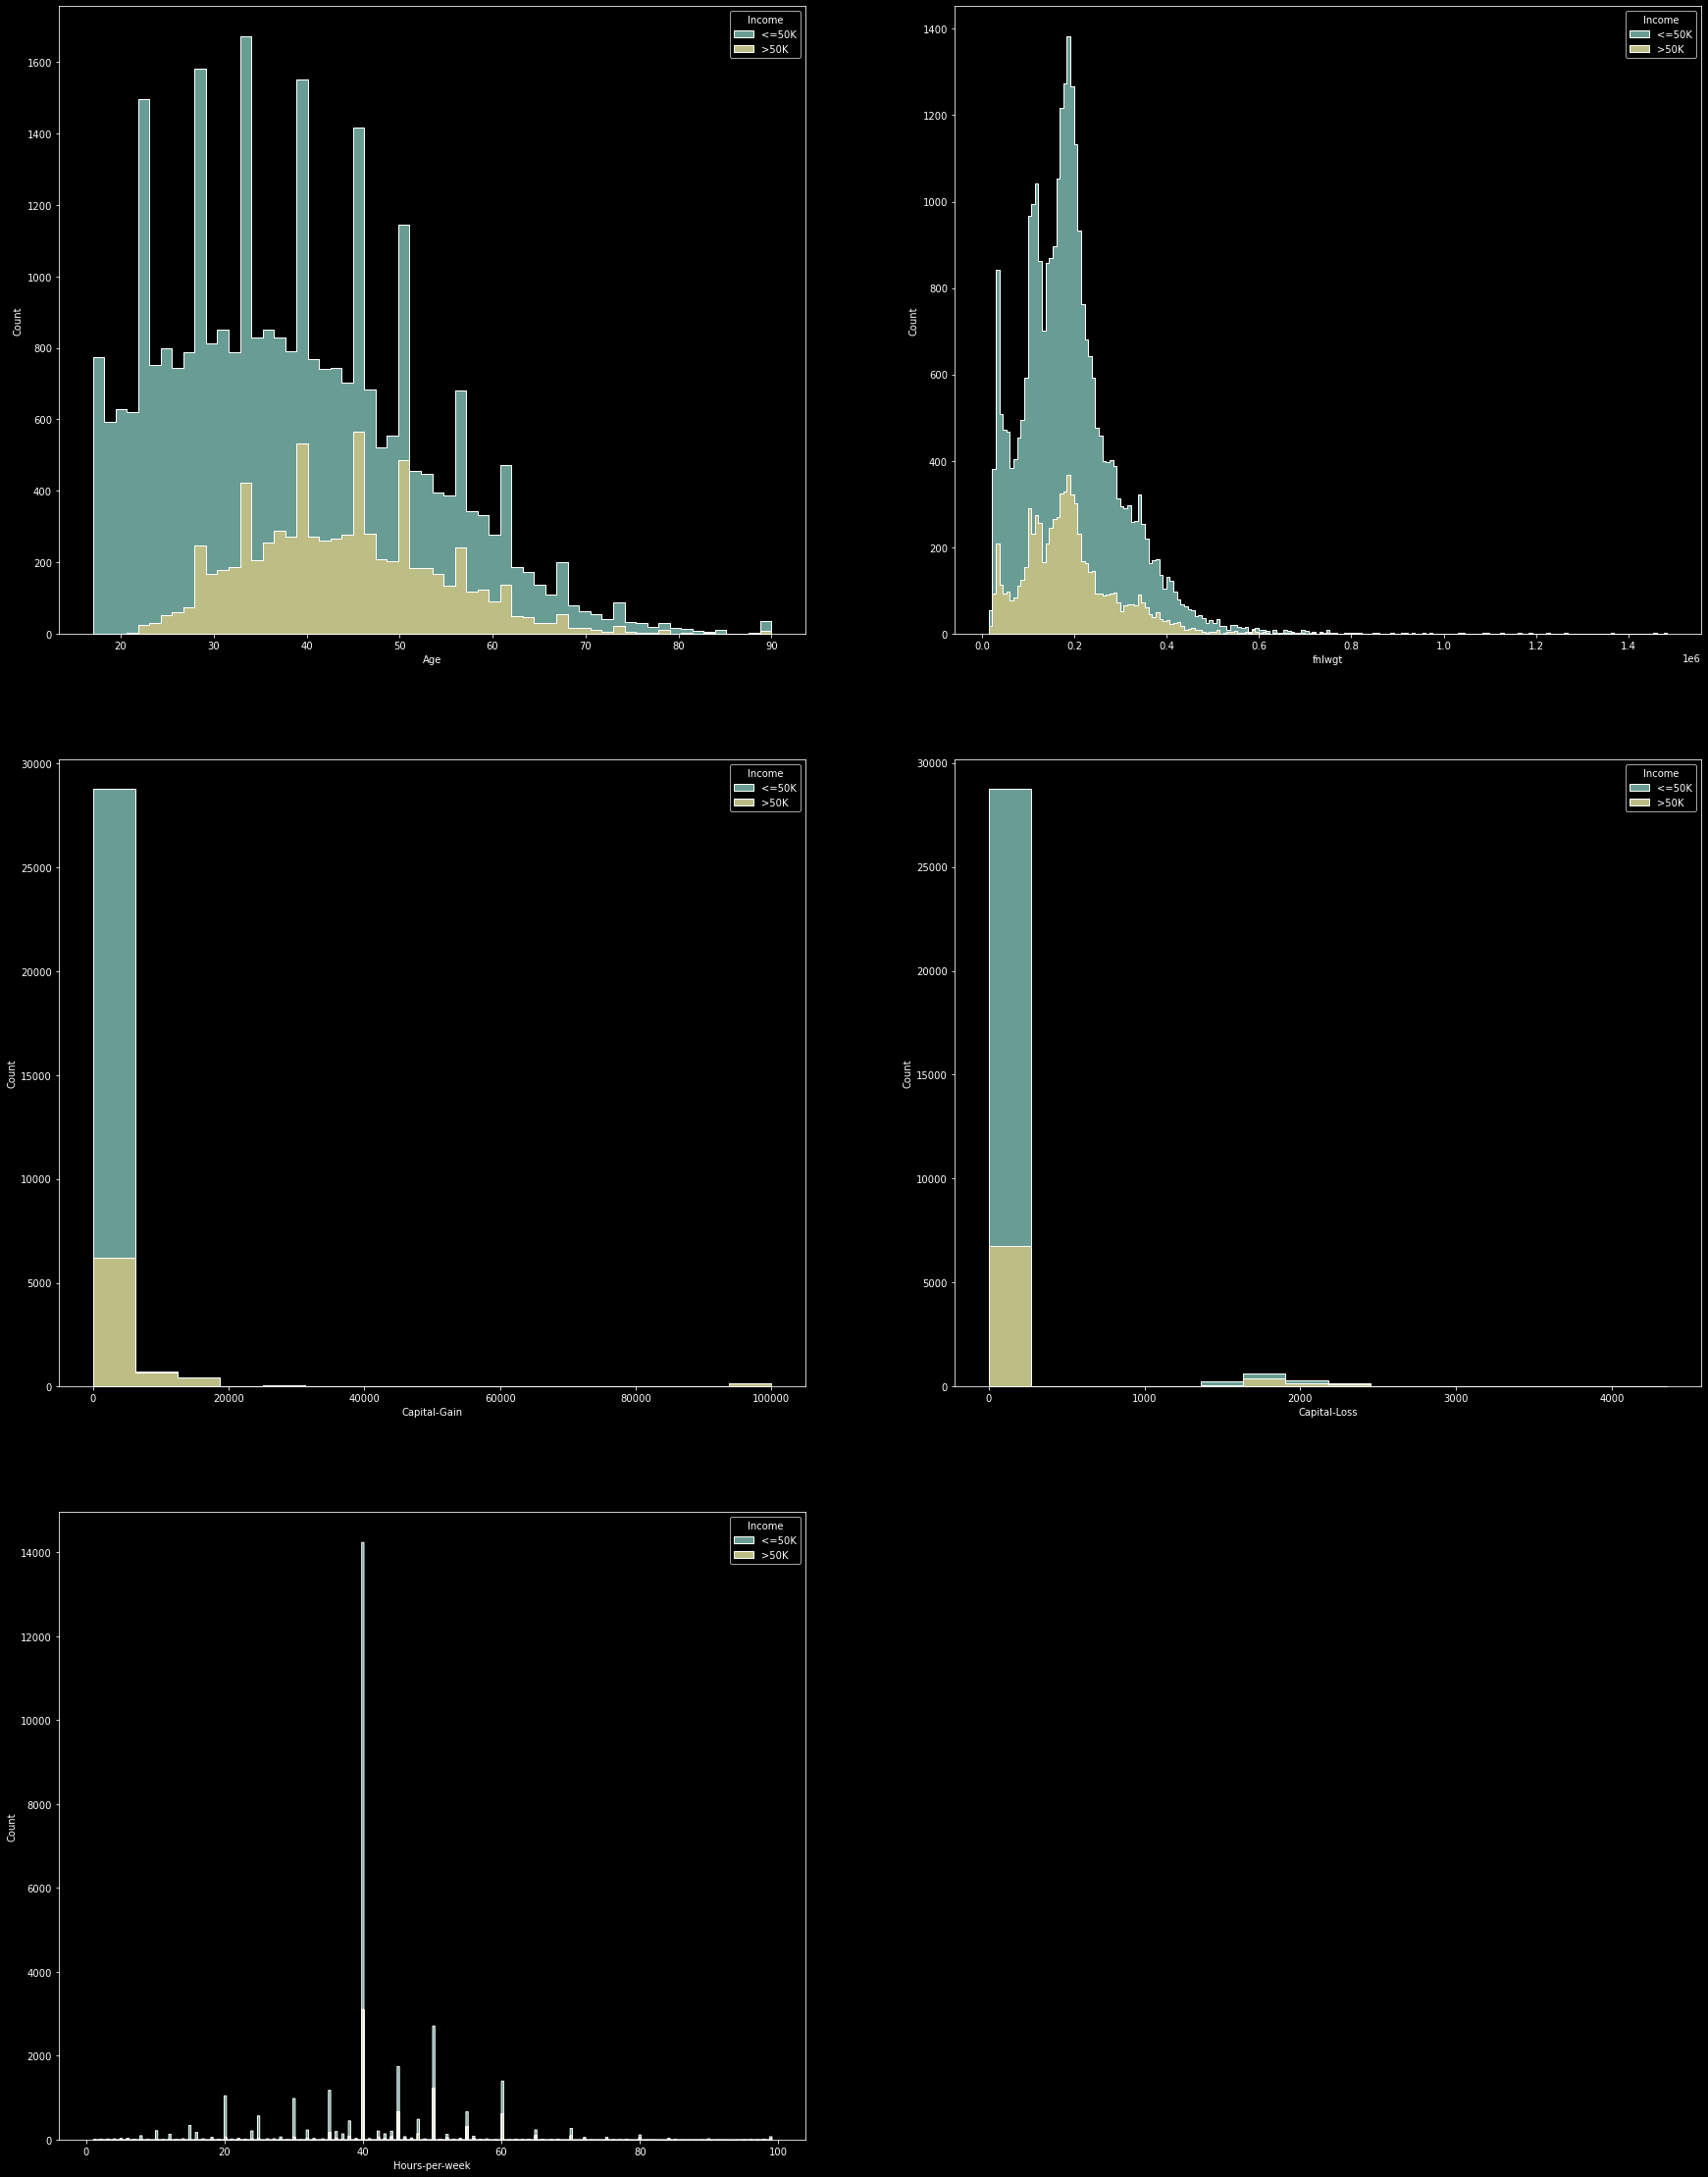

In [20]:
l = []
c=1
plt.figure(figsize=(30,40))

for i in df.columns:    
    if df[i].dtype == 'int64':
        l.append(i)
        
for i in l:
    plt.subplot(3,2,c)
    sns.histplot(df, x= i , hue='Income' , multiple="stack" , element="step")
    c = c + 1
plt.show()

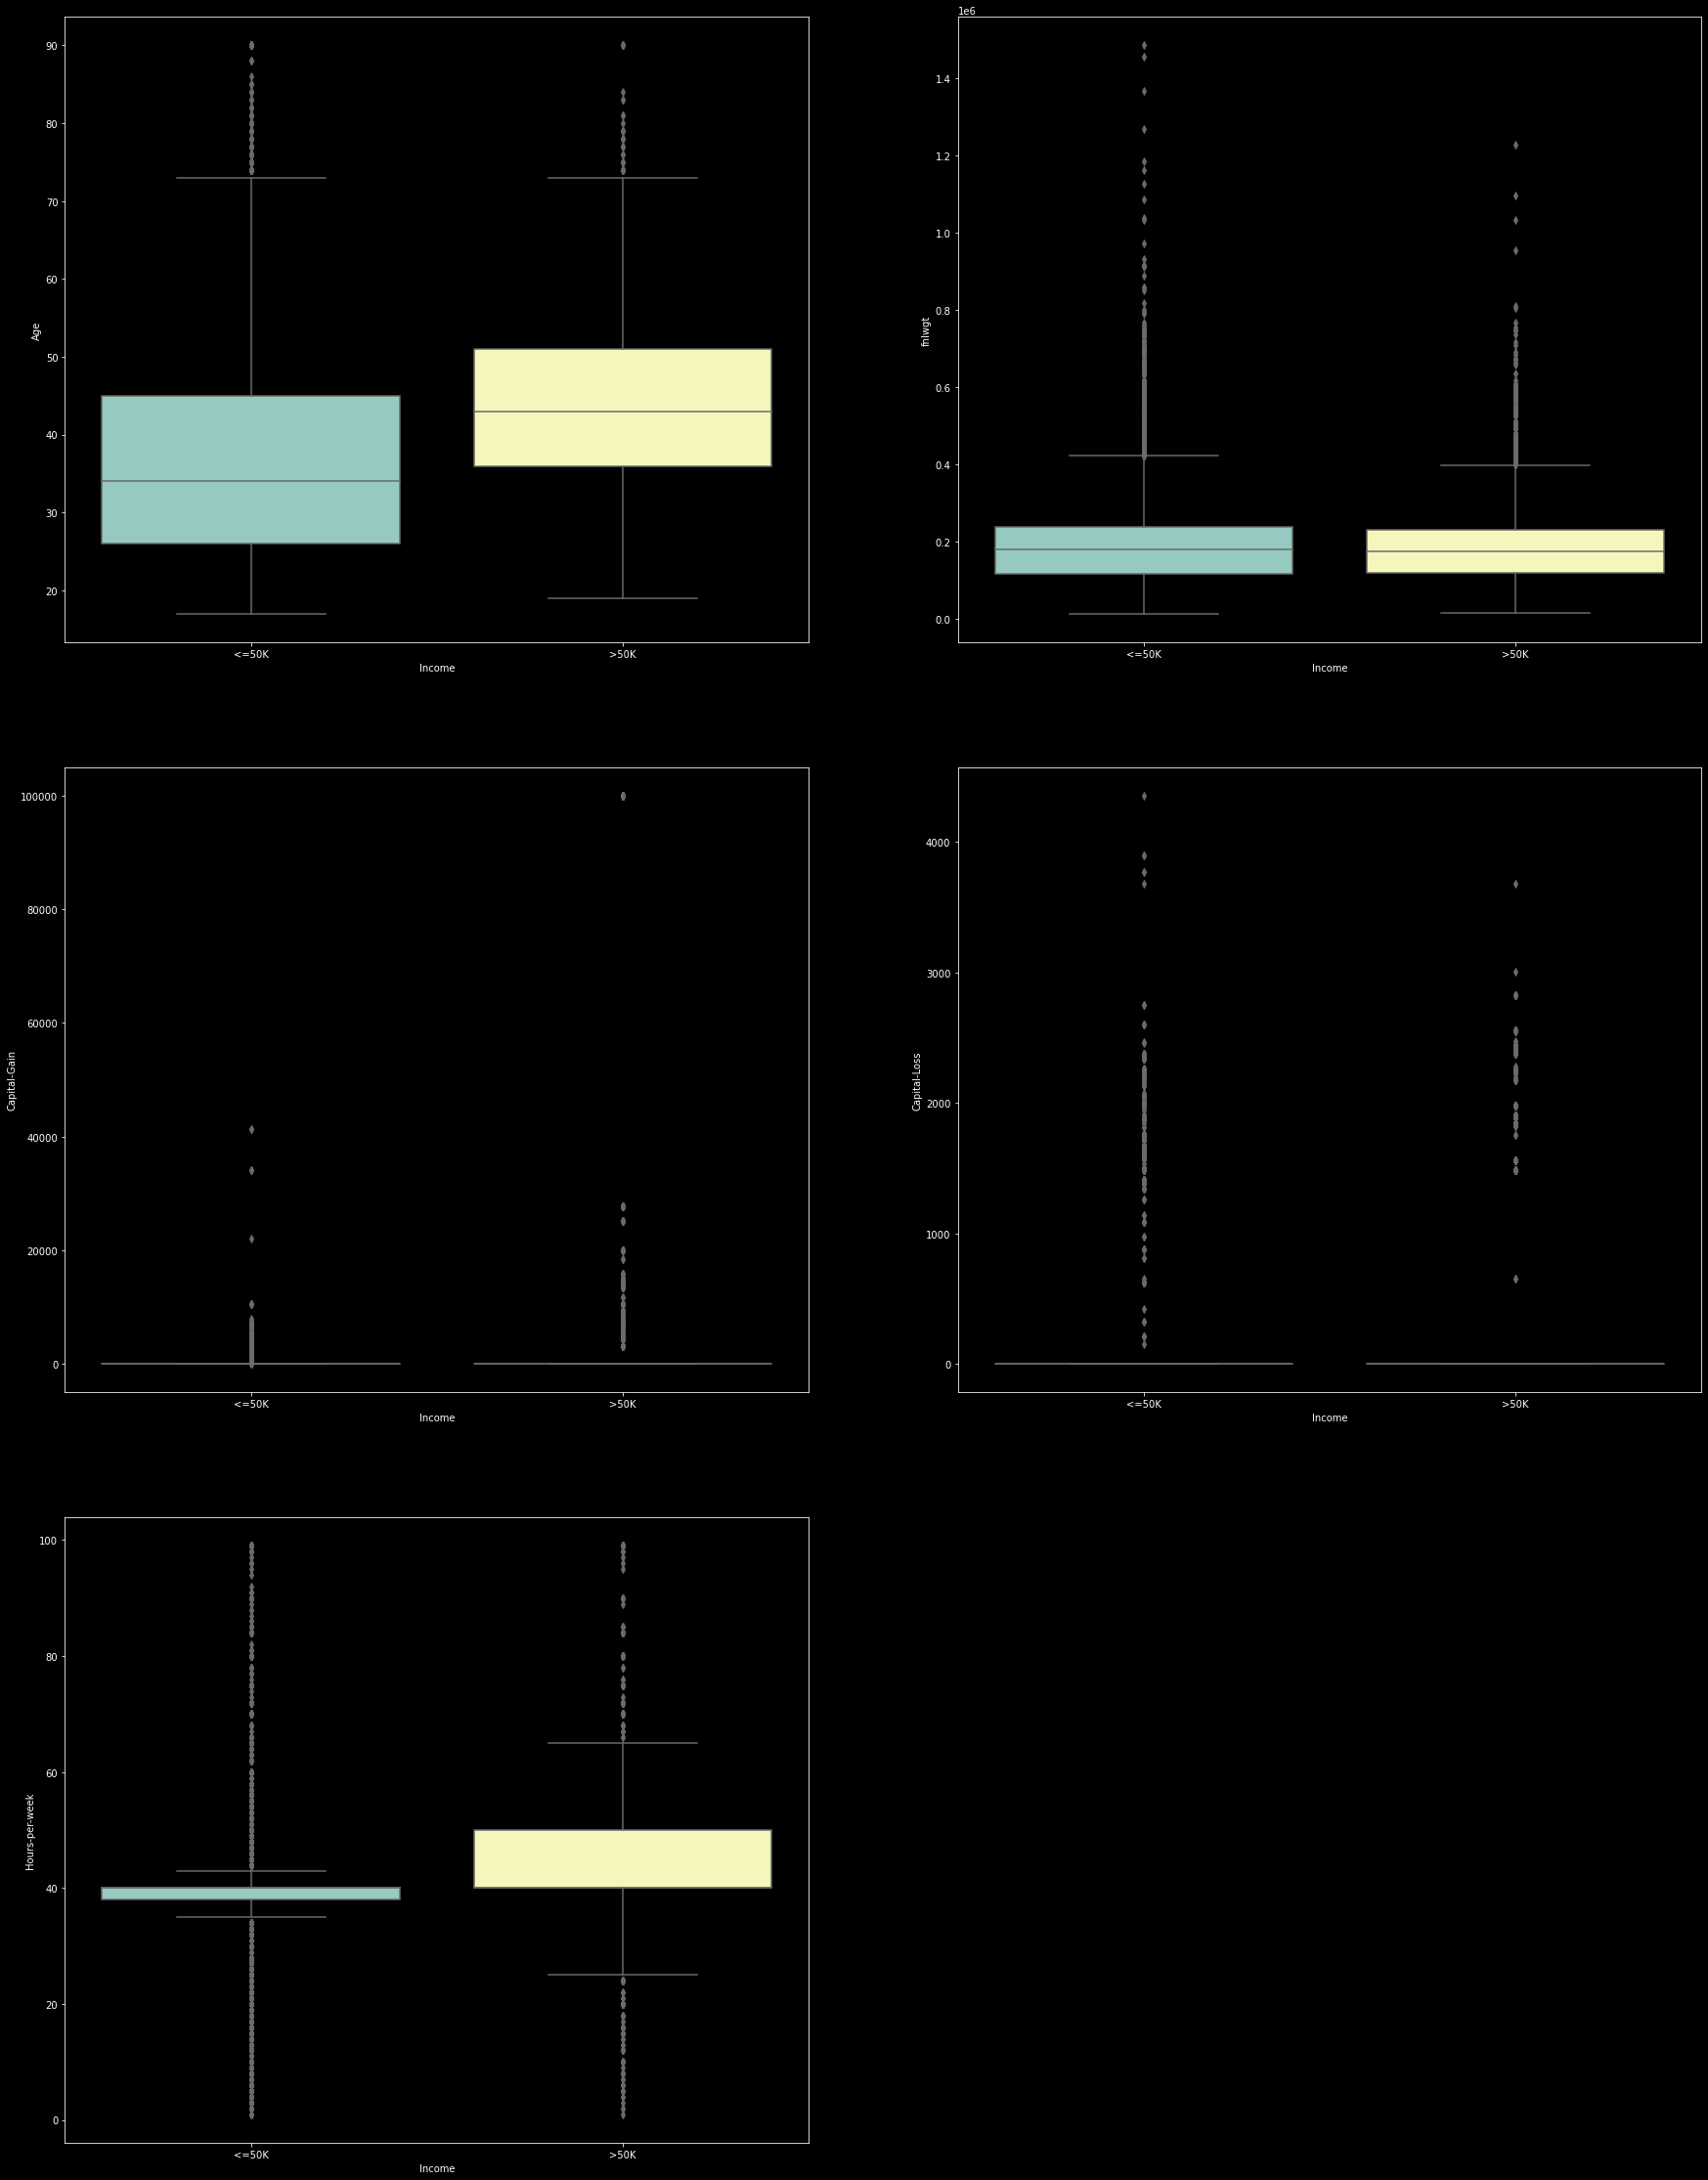

In [21]:
l = []
c=1
plt.figure(figsize=(30,40))

for i in df.columns:    
    if df[i].dtype == 'int64':
        l.append(i)
        
for i in l:
    plt.subplot(3,2,c)
    sns.boxplot(data = df, y= i , x='Income', orient= 'v')
    c = c + 1
plt.show()

as we can observe we have a lot of outliers in this dataset, but for the sake of simplicity we are not doing anything related to ooutliers, otherwise we can do a lot of different techniques to remove/impute them.

In [22]:
df.nunique()

Age                  72
Workclass             7
fnlwgt            20262
Education            16
Martial Status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital-Gain        118
Capital-Loss         90
Hours-per-week       94
Country              40
Income                2
dtype: int64

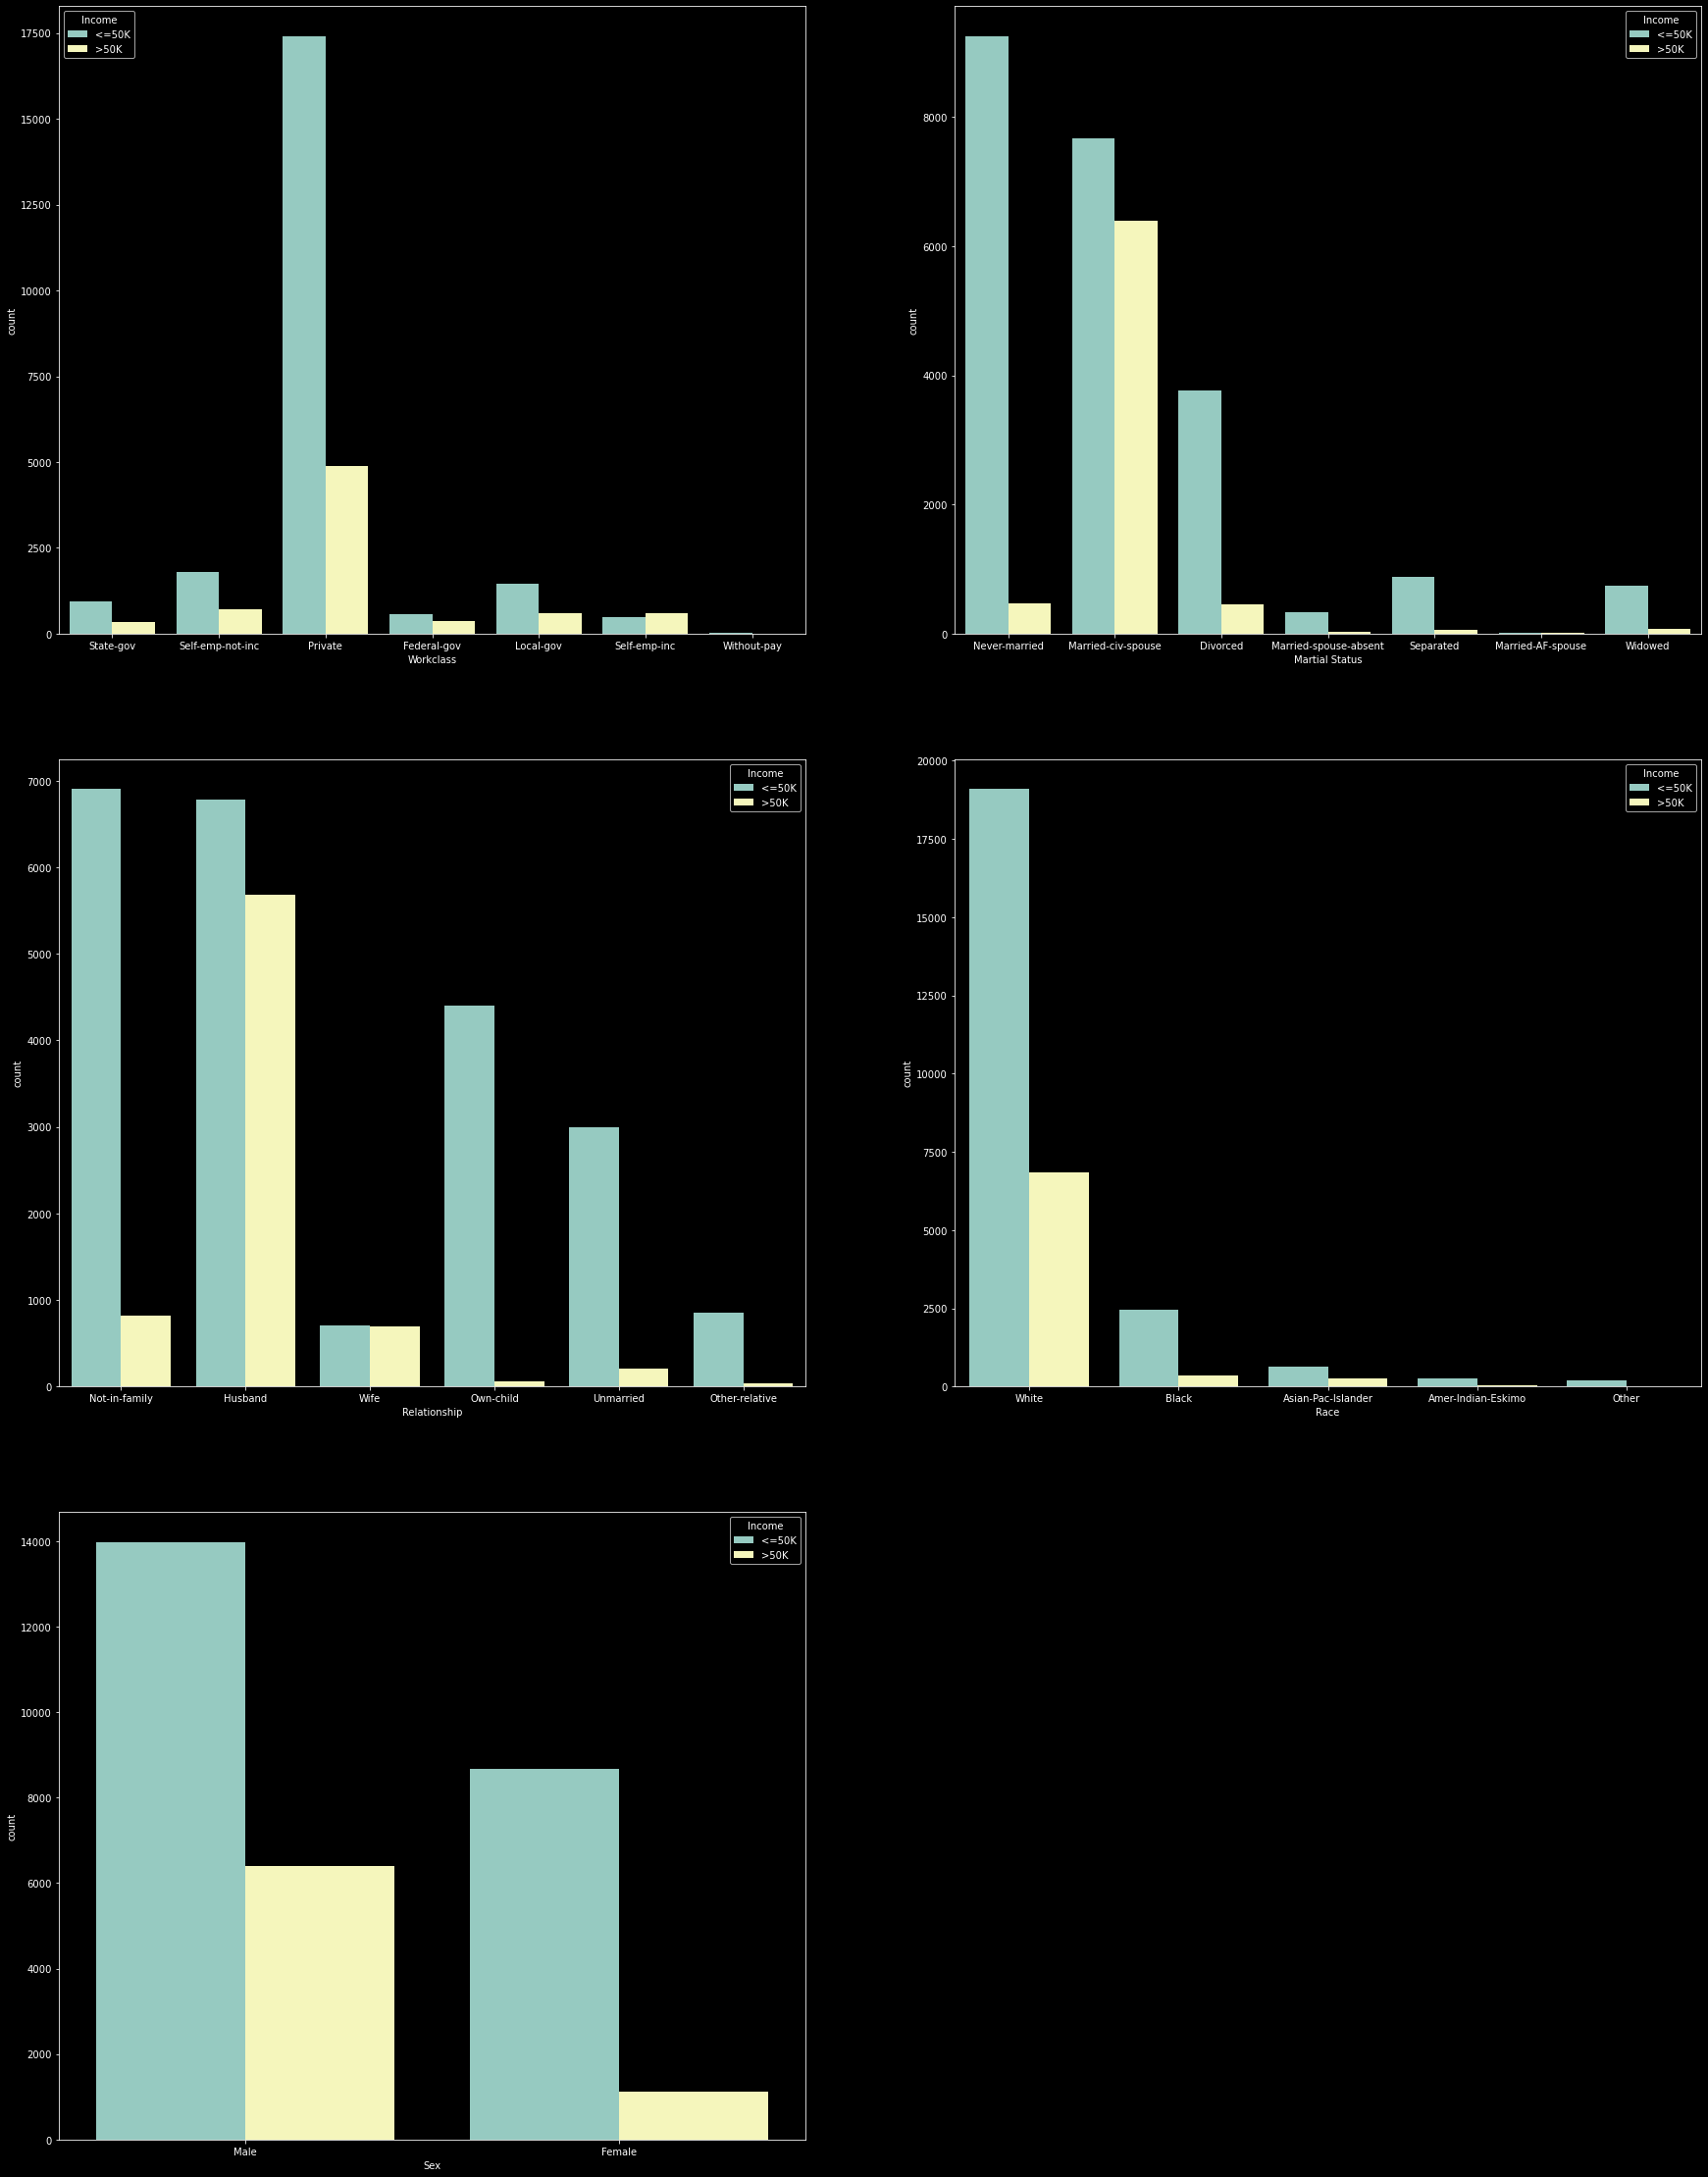

In [23]:
l = []
c=1
plt.figure(figsize=(30,40))

for i in df.columns:    
    if df[i].dtype == 'O':
        l.append(i)
        
for i in l[:-1]:
    if df[i].nunique() < 8:
        plt.subplot(3,2,c)
        sns.countplot( df[i] , hue=df['Income'] )
        c = c + 1
plt.show()

In [24]:
df['Income']=df['Income'].map({'<=50K': 0, '>50K': 1})

<AxesSubplot:>

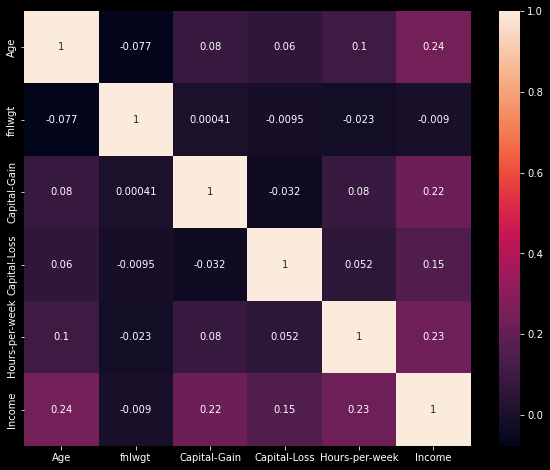

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

In [26]:
df.head()

,Age,Workclass,fnlwgt,Education,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## Training the Model

#### 1. Dummifying the categorical columns and no Scaling applied

In [27]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [28]:
X = df_dummy.drop('Income',axis=1)
y = df_dummy['Income']

In [29]:
X.head()

,Age,fnlwgt,Capital-Gain,Capital-Loss,Hours-per-week,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,...,Country_Portugal,Country_Puerto-Rico,Country_Scotland,Country_South,Country_Taiwan,Country_Thailand,Country_Trinadad&Tobago,Country_United-States,Country_Vietnam,Country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [31]:
clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
model,predictions = clf.fit(X_train, X_test, y_train, y_test)
model

 90%|████████▉ | 26/29 [04:51<00:44, 14.84s/it]

[14:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [04:55<00:00, 10.17s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.87,0.79,0.79,0.86,0.47
NearestCentroid,0.76,0.79,0.79,0.78,0.19
XGBClassifier,0.86,0.79,0.79,0.86,2.92
BernoulliNB,0.80,0.78,0.78,0.80,0.27
AdaBoostClassifier,0.85,0.78,0.78,0.85,1.93
RandomForestClassifier,0.85,0.77,0.77,0.84,3.51
LogisticRegression,0.85,0.76,0.76,0.84,0.57
CalibratedClassifierCV,0.85,0.76,0.76,0.84,41.85
LinearSVC,0.85,0.76,0.76,0.84,10.14


#### 2. Scaling the numerical columns first and then dummifying the the categorical columns

In [32]:
df.head()

,Age,Workclass,fnlwgt,Education,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [33]:
df.shape

(30161, 14)

In [34]:
int_col = []
cat_col = []

for i in df.columns:
    if df[i].dtype == 'int64':
        int_col.append(i)

for i in df.columns:
    if df[i].dtype != 'int64':
        cat_col.append(i)

print(int_col)
print(cat_col)

['Age', 'fnlwgt', 'Capital-Gain', 'Capital-Loss', 'Hours-per-week', 'Income']
['Workclass', 'Education', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']


In [35]:
df_int = df[int_col[:-1]]
df_cat = df[cat_col]

print(df_int.shape)
print(df_cat.shape)

(30161, 5)
(30161, 8)


In [36]:
df_int.head()

,Age,fnlwgt,Capital-Gain,Capital-Loss,Hours-per-week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40


In [37]:
df_int = pd.DataFrame(scalar.fit_transform(df_int), columns=df_int.columns)
print(df_int.shape)
df_int.head()

(30161, 5)


,Age,fnlwgt,Capital-Gain,Capital-Loss,Hours-per-week
0,0.04,-1.06,0.15,-0.22,-0.08
1,0.88,-1.01,-0.15,-0.22,-2.33
2,-0.03,0.24,-0.15,-0.22,-0.08
3,1.11,0.43,-0.15,-0.22,-0.08
4,-0.79,1.41,-0.15,-0.22,-0.08


In [38]:
print(df_cat.shape)
df_cat.head()

(30161, 8)


,Workclass,Education,Martial Status,Occupation,Relationship,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [39]:
df_cat[['Age', 'fnlwgt', 'Capital-Gain', 'Capital-Loss', 'Hours-per-week']] = df_int

In [40]:
df_cat['Income'] = df['Income']

In [41]:
df1 = df_cat.copy()
df1.head()

,Workclass,Education,Martial Status,Occupation,Relationship,Race,Sex,Country,Age,fnlwgt,Capital-Gain,Capital-Loss,Hours-per-week,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0.04,-1.06,0.15,-0.22,-0.08,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0.88,-1.01,-0.15,-0.22,-2.33,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,-0.03,0.24,-0.15,-0.22,-0.08,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,1.11,0.43,-0.15,-0.22,-0.08,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,-0.79,1.41,-0.15,-0.22,-0.08,0


In [42]:
X = df1.drop('Income',axis=1)
y = df1.Income

In [43]:
X = pd.get_dummies(X, drop_first=True)

In [44]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [45]:
clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
model,predictions = clf.fit(X_train, X_test, y_train, y_test)
model

 90%|████████▉ | 26/29 [04:45<00:51, 17.03s/it]

[14:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [04:47<00:00,  9.90s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.78,0.78,0.78,0.79,0.24
NearestCentroid,0.75,0.78,0.78,0.76,0.21
LogisticRegression,0.83,0.73,0.73,0.82,0.62
LinearSVC,0.82,0.73,0.73,0.82,12.76
CalibratedClassifierCV,0.83,0.73,0.73,0.82,41.04
LGBMClassifier,0.82,0.73,0.73,0.81,0.46
AdaBoostClassifier,0.82,0.73,0.73,0.81,2.58
LinearDiscriminantAnalysis,0.82,0.73,0.73,0.81,0.58
XGBClassifier,0.82,0.72,0.72,0.81,1.31


As we can observe the accuracy has dropped significantly as compared to last model. Now we will try different method.

#### 3. Now dummifying the categorical columns first and applying scaling to all the columns

In [46]:
df.head()

,Age,Workclass,fnlwgt,Education,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [47]:
X = df.drop('Income',axis=1)
y = df.Income

In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
x_transform = scalar.fit_transform(X)

In [50]:
x_transform.shape

(30161, 94)

In [51]:
pd.DataFrame(x_transform).head()

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.04,-1.06,0.15,-0.22,-0.08,-0.27,-1.68,-0.19,-0.30,4.75,...,-0.03,-0.06,-0.02,-0.05,-0.04,-0.02,-0.02,0.31,-0.05,-0.02
1,0.88,-1.01,-0.15,-0.22,-2.33,-0.27,-1.68,-0.19,3.33,-0.21,...,-0.03,-0.06,-0.02,-0.05,-0.04,-0.02,-0.02,0.31,-0.05,-0.02
2,-0.03,0.24,-0.15,-0.22,-0.08,-0.27,0.59,-0.19,-0.30,-0.21,...,-0.03,-0.06,-0.02,-0.05,-0.04,-0.02,-0.02,0.31,-0.05,-0.02
3,1.11,0.43,-0.15,-0.22,-0.08,-0.27,0.59,-0.19,-0.30,-0.21,...,-0.03,-0.06,-0.02,-0.05,-0.04,-0.02,-0.02,0.31,-0.05,-0.02
4,-0.79,1.41,-0.15,-0.22,-0.08,-0.27,0.59,-0.19,-0.30,-0.21,...,-0.03,-0.06,-0.02,-0.05,-0.04,-0.02,-0.02,-3.22,-0.05,-0.02


In [52]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

In [53]:
clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
model,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
model

 90%|████████▉ | 26/29 [04:29<00:43, 14.34s/it]

[14:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [04:30<00:00,  9.34s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.87,0.79,0.79,0.86,0.37
NearestCentroid,0.76,0.79,0.79,0.78,0.12
XGBClassifier,0.86,0.79,0.79,0.86,1.28
BernoulliNB,0.80,0.78,0.78,0.80,0.23
AdaBoostClassifier,0.85,0.78,0.78,0.85,2.78
RandomForestClassifier,0.85,0.77,0.77,0.84,2.92
LogisticRegression,0.85,0.76,0.76,0.84,0.52
CalibratedClassifierCV,0.85,0.76,0.76,0.84,38.07
LinearSVC,0.85,0.76,0.76,0.84,10.04


We can easily compare both pre scaling and post scaling models and the result in terms of accuracy is almost identical but notice the time taken to train the model is significantly lower when the features have been scaled down after dummification of categorical columns. 

And also in terms of the best algorithm we can compare the accuracy as conclude that XGBClassifier and LGBMClassifier have same accuracy but LGBMClassifier has taken the lesser time to train the model, which would come in handy if we were to deal my large number of data. So for scalibility purpose we'll use LGBMClassifier moving forward. 

### Applying model

In [54]:
# build the lightgbm model
from lightgbm import LGBMClassifier
clf = LGBMClassifier()

In [55]:
clf.fit(X_train_scaled, y_train_scaled)

LGBMClassifier()

In [56]:
print('The accuracy for training dataset is ', round(clf.score(X_train_scaled, y_train_scaled)*100,2))
print('The accuracy for testing dataset is ', round(clf.score(X_test_scaled, y_test_scaled)*100,2))

The accuracy for training dataset is  88.86
The accuracy for testing dataset is  86.57


In [57]:
param_grid = {'num_leaves': [int(x) for x in np.linspace(0, 50, 30)],
              'max_depth' : [int(x) for x in np.linspace(-10, 110, num=50)],
              'learning_rate' : [0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10],
              'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1000, num=20)]
              }


In [58]:
clf =  LGBMClassifier()

In [59]:
model = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=1000 ,n_jobs= -1, cv= 5, verbose=2)

In [60]:
model.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=1000, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.05, 0.01,
                                                          0.1, 0.5, 1, 5, 10],
                                        'max_depth': [-10, -7, -5, -2, 0, 2, 4,
                                                      7, 9, 12, 14, 16, 19, 21,
                                                      24, 26, 29, 31, 34, 36,
                                                      38, 41, 43, 46, 48, 51,
                                                      53, 56, 58, 61, ...],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 

In [61]:
model.best_params_

{'num_leaves': 41, 'n_estimators': 810, 'max_depth': 9, 'learning_rate': 0.01}

In [62]:
model = LGBMClassifier(**model.best_params_)

In [63]:
model.fit(X_train_scaled, y_train_scaled)

LGBMClassifier(learning_rate=0.01, max_depth=9, n_estimators=810, num_leaves=41)

In [64]:
print('The accuracy for training dataset is ', round(model.score(X_train_scaled, y_train_scaled)*100,2))
print('The accuracy for testing dataset is ', round(model.score(X_test_scaled, y_test_scaled)*100,2))

The accuracy for training dataset is  88.65
The accuracy for testing dataset is  86.55


In [65]:
with open('/datasets/Adult Salary Prediction/modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('/datasets/Adult Salary Prediction//standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [66]:
with open('/datasets/Adult Salary Prediction/modelForPrediction.sav' , 'rb') as f:
    model = pickle.load(f)

In [67]:
y_pred = model.predict(X_test_scaled)

In [68]:
accuracy_score(y_test_scaled,y_pred)

0.8655100011050945

--------------------------------------------------------------------------------------------------------------------------------------------------------

### Applying the model to a new Test Dataset

In [69]:
def test_data_prediction(df):
    df = df.reset_index()
    
    column_names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num",
                    "Martial Status", "Occupation", "Relationship", "Race", "Sex",
                    "Capital-Gain", "Capital-Loss", "Hours-per-week", "Country", "Income"]

    df.columns = column_names

    df[df == '?'] = np.nan

    df.dropna(how="any", inplace=True)

    df.drop('Education-Num', axis=1, inplace=True)

    df['Income']=df['Income'].map({'<=50K.': 0, '>50K.': 1})

    X = df.drop('Income',axis=1)
    y = df['Income']

    X = pd.get_dummies(X, drop_first=True)

    # return X.head()

    x_transform = scalar.fit_transform(X)

    
    with open('/datasets/Adult Salary Prediction/modelForPrediction.sav' , 'rb') as f:
        model = pickle.load(f)

    y_pred = model.predict(x_transform)


    print(round(accuracy_score(y,y_pred)*100,2))


In [70]:
new_df = pd.read_csv(adult_test, skipinitialspace= True)

In [71]:
new_df

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [72]:
test_data_prediction(new_df)

85.97


As we can see, we gets very good accuracy score on a brand new data set, which indicated how good our model is.

## THANK YOU